## P2
Małgorzata Kurcjusz-Gzowska 

In [100]:
import networkx as nx
import math
import matplotlib.pyplot as plt
from scipy.io import mmread

#### P2.1 Import and draw in readable form networks from the external sources 
#### [each different example x 1.5P]

##### Example 1

  @inproceedings{nr-aaai15,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={http://networkrepository.com},
      year={2015}
  }

  https://networkrepository.com/asn.php

  aves-songbird-social

In [101]:
network1 = 'aves-songbird-social/aves-songbird-social.edges'
network1 = nx.read_weighted_edgelist(network1) 
network1

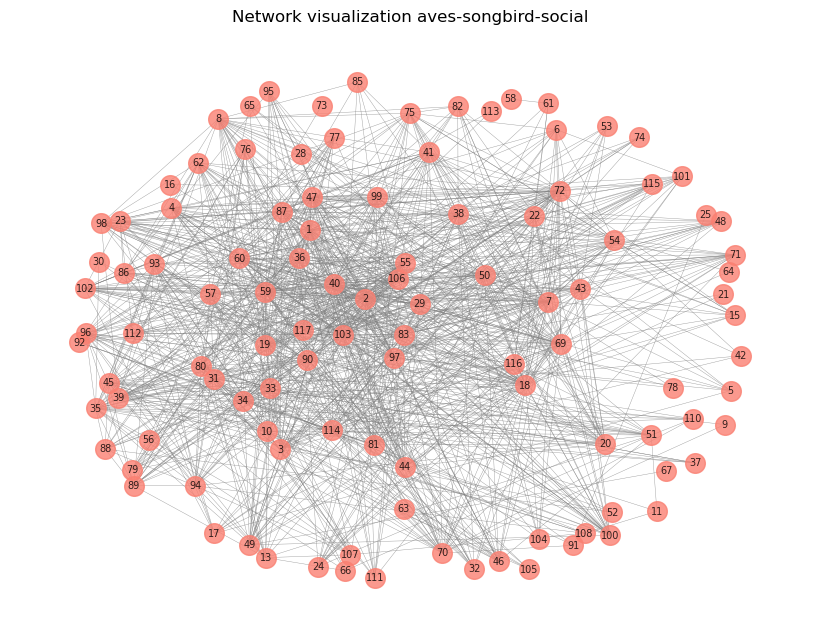

In [102]:
plt.figure(figsize=(8,6))

# parameter k controls the spacing of the network — the larger the value, the more spread out the nodes are
positions = nx.spring_layout(network1, k=0.5, seed=42)

nx.draw(network1, positions, with_labels=True, node_color='salmon', edge_color='gray', node_size=200, 
        width=0.3, font_size=7, alpha=0.8)
plt.title("Network visualization aves-songbird-social")
plt.show()

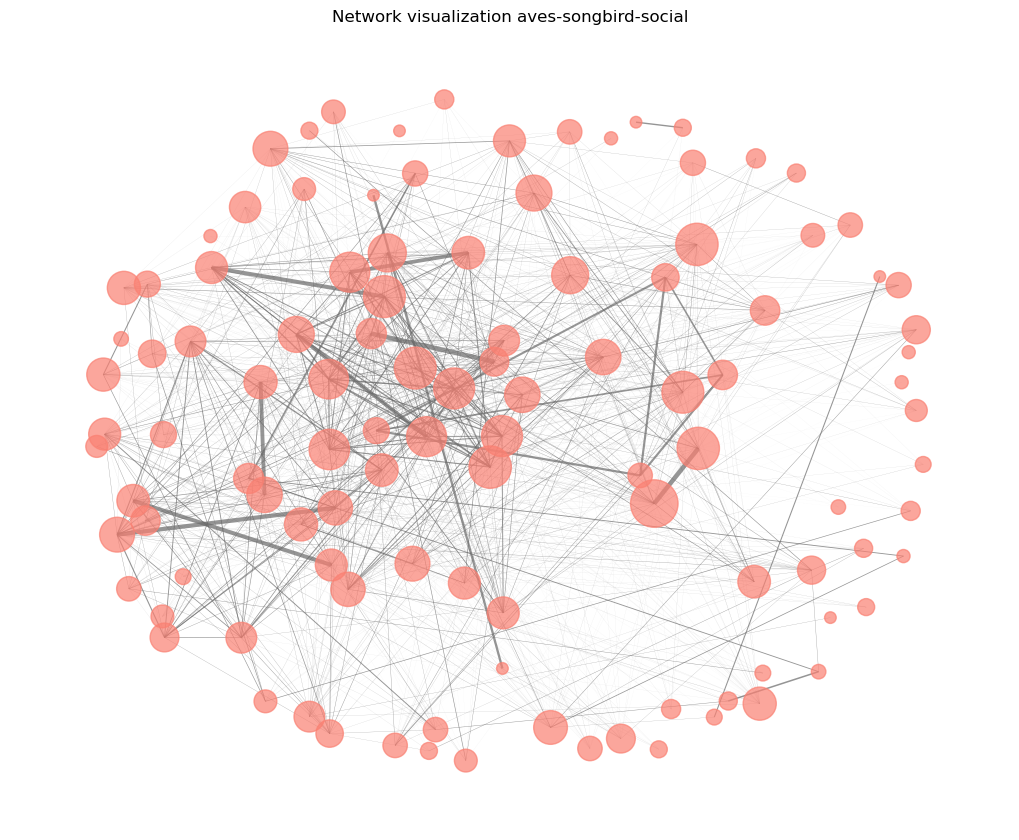

In [103]:
plt.figure(figsize=(10, 8))

# larger k more spacing
positions = nx.spring_layout(network1, k=0.5, seed=42)

# dynamic sizes and widths
node_sizes = [50 + 20 * network1.degree(n) for n in network1.nodes()]
edge_widths = [d['weight'] * 10 for (u, v, d) in network1.edges(data=True)]

nx.draw(
    network1, positions, with_labels=False,          # turn off labels?
    node_color='salmon', edge_color='dimgray', node_size=node_sizes, width=edge_widths, alpha=0.7)

plt.title("Network visualization aves-songbird-social")
plt.axis('off')
plt.show()


##### Example 2

In [104]:
network2 = 'aves-weaver-social-06/aves-weaver-social-06.edges'
#etwork2 = nx.read_weighted_edgelist(network2)
network2 = nx.read_edgelist(network2) 
network2

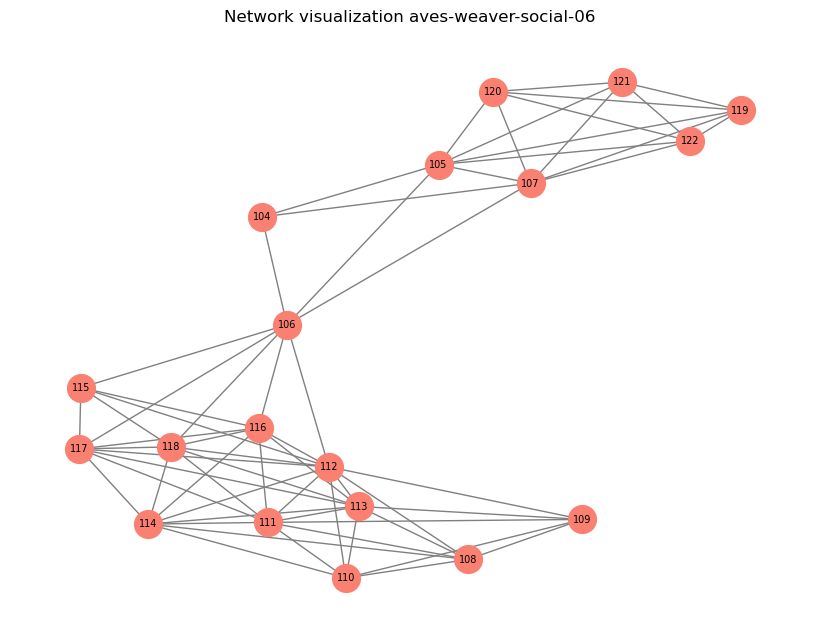

In [105]:
#network visualization
plt.figure(figsize=(8,6))

positions = nx.spring_layout(network2, k=0.5, seed=42)

nx.draw(network2, positions, with_labels=True, node_color='salmon', edge_color='gray', node_size=400, font_size=7)
plt.title("Network visualization aves-weaver-social-06")
plt.show()

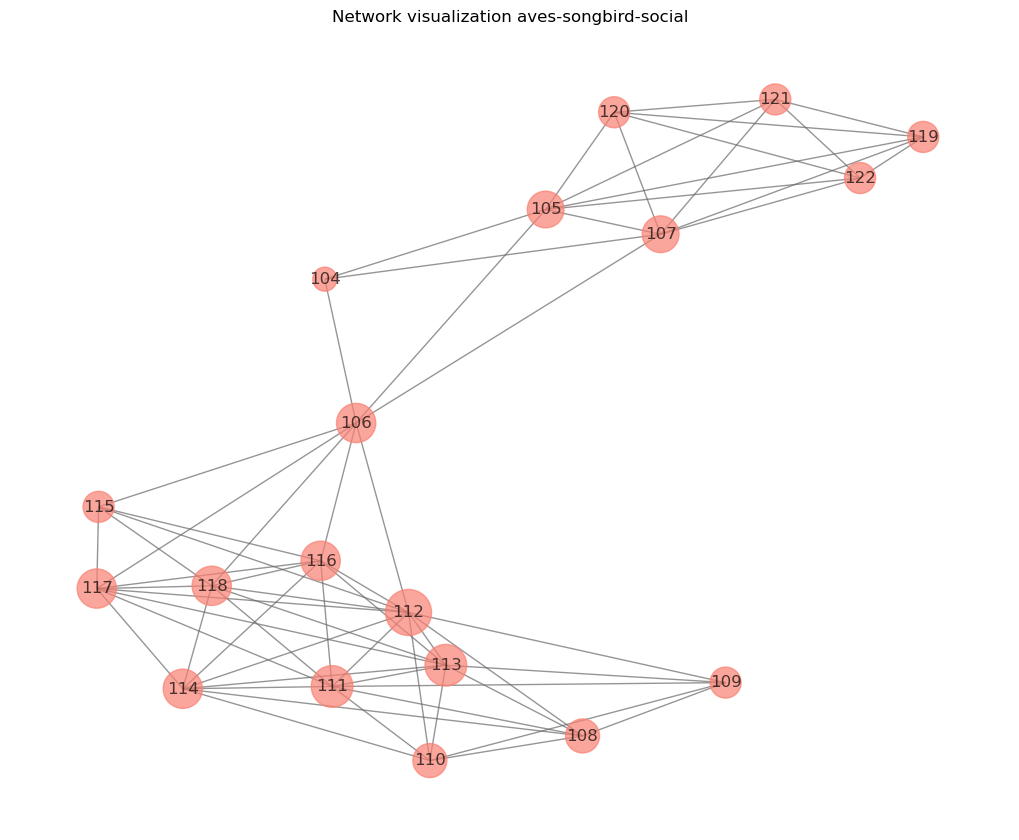

In [106]:
plt.figure(figsize=(10, 8))

# larger k more spacing
positions = nx.spring_layout(network2, k=0.5, seed=42)

# dynamic sizes and widths
node_sizes = [100 * network2.degree(n) for n in network2.nodes()]

nx.draw(
    network2, positions, with_labels=True,          # turn off labels?
    node_color='salmon', edge_color='dimgray', node_size=node_sizes, 
    alpha=0.7)

plt.title("Network visualization aves-songbird-social")
plt.axis('off')
plt.show()


##### Example 3

In [107]:
network3 = 'insecta-ant-colony4-day38/insecta-ant-colony4-day38.edges'
network3 = nx.read_weighted_edgelist(network3) 
network3

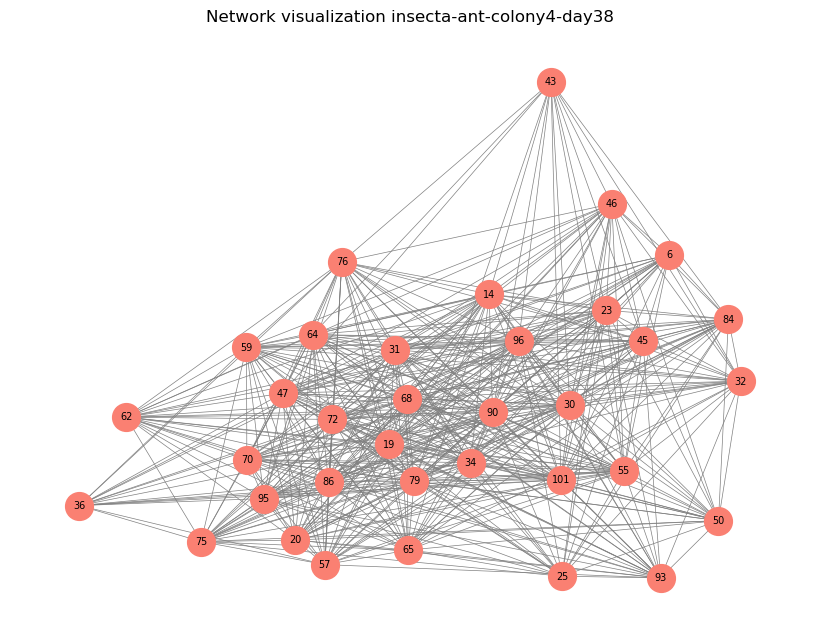

In [108]:
#network visualization
plt.figure(figsize=(8,6))

positions = nx.spring_layout(network3, k=0.5, seed=42)

nx.draw(network3, positions, with_labels=True, node_color='salmon', edge_color='gray', node_size=400, width=0.5, font_size=7)
plt.title("Network visualization insecta-ant-colony4-day38")
plt.show()

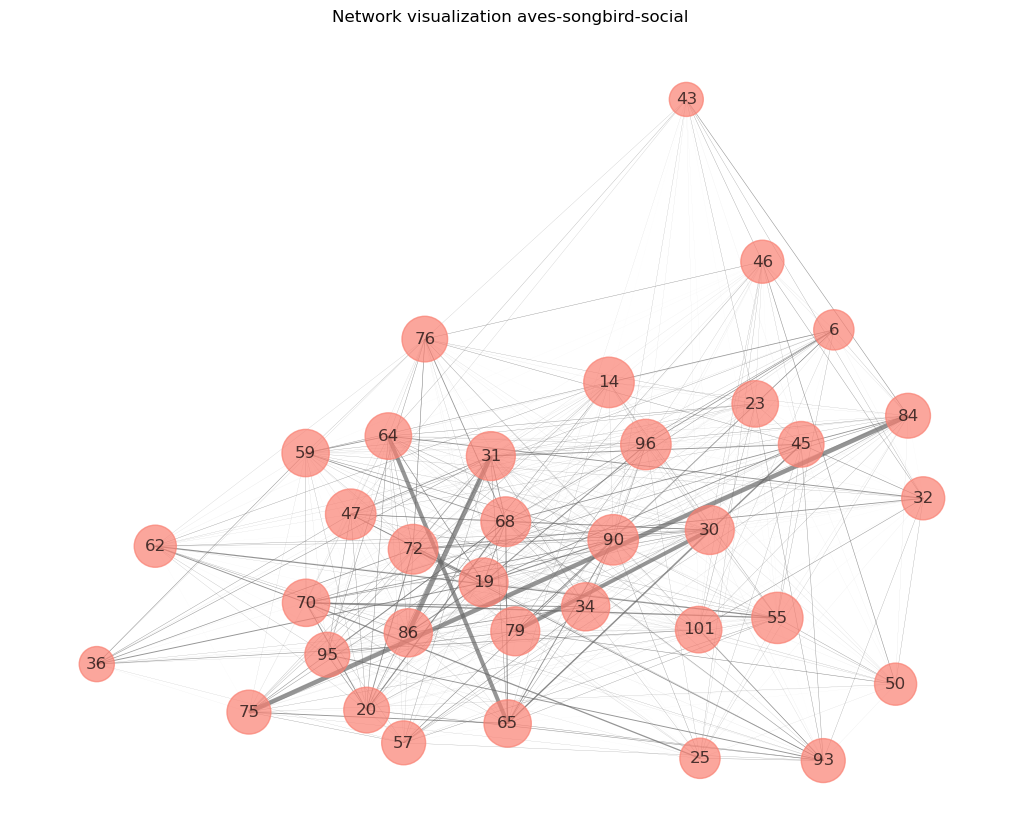

In [109]:
plt.figure(figsize=(10, 8))

# larger k more spacing
positions = nx.spring_layout(network3, k=0.5, seed=42)

# dynamic sizes and widths
node_sizes = [40 * network3.degree(n) for n in network3.nodes()]
edge_widths = [d['weight'] * 10 for (u, v, d) in network1.edges(data=True)]

nx.draw(
    network3, positions, with_labels=True,          # turn off labels?
    node_color='salmon', edge_color='dimgray', node_size=node_sizes, width=edge_widths, alpha=0.7)

plt.title("Network visualization aves-songbird-social")
plt.axis('off')
plt.show()

##### Example 4

In [110]:
path = 'ca-netscience/ca-netscience.mtx'
with open(path, 'r', encoding='utf-8', errors='ignore') as f:
    for _ in range(10):
        print(repr(f.readline()))

'%MatrixMarket matrix coordinate pattern symmetric \n'
'% 379 379 914\n'
'2 1\n'
'3 1\n'
'4 1\n'
'5 1\n'
'16 1\n'
'44 1\n'
'113 1\n'
'131 1\n'


In [111]:
# without header:
network4 = nx.read_edgelist(
    path,
    comments='%',        # ignore lines starting from %
    delimiter=' ',       # separator 
    nodetype=int,       
    data=False           # without weights because is's 'pattern symmetric'
)


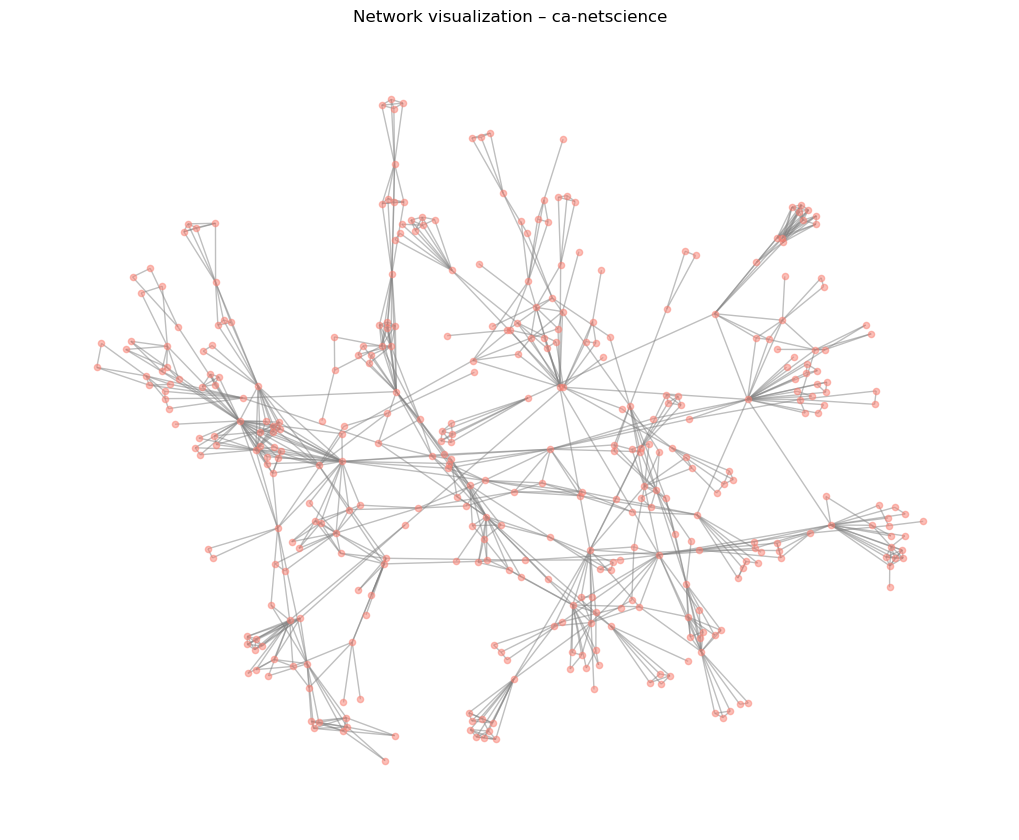

In [112]:
plt.figure(figsize=(10, 8))
# k=0.1
position = nx.spring_layout(network4, k=0.1, seed=42)
nx.draw(network4, position, node_size=20, edge_color='gray',node_color='salmon', alpha=0.5)
plt.title("Network visualization – ca-netscience")
plt.axis('off')
plt.show()

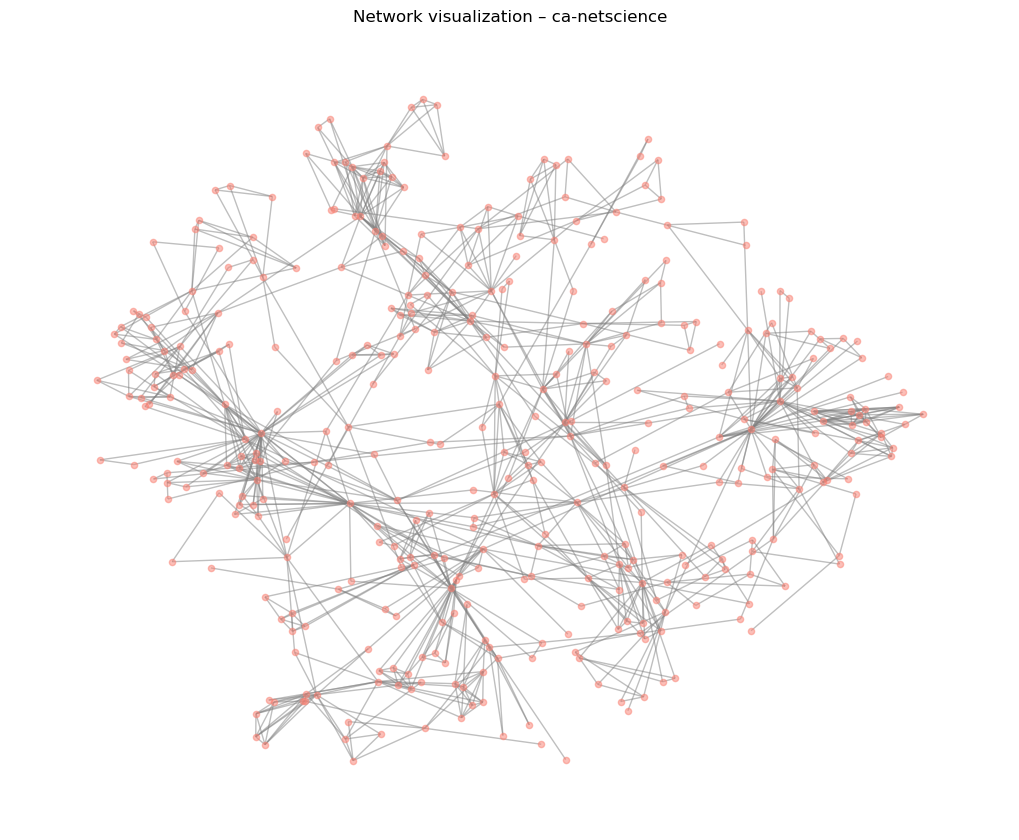

In [113]:
plt.figure(figsize=(10, 8))
# k=0.2
position = nx.spring_layout(network4, k=0.2, seed=42)
nx.draw(network4, position, node_size=20, edge_color='gray',node_color='salmon', alpha=0.5)
plt.title("Network visualization – ca-netscience")
plt.axis('off')
plt.show()

#### P2.2 Discuss the features of real networks on the examples from the previous tasks. [1P]

In the songbird, weaver and ant colony networks, individuals are connected through a few intermediate nodes, forming clusters of closely interacting animals. In CA-Netscience, scientists are grouped in research subfields, but there are still short paths connecting any two authors.

The bird and ant networks show natural subgroups representing flocks or functional groups within a colony. In CA-Netscience, communities correspond to research teams or co-author groups.

In the ant and songbird networks, some individuals act as leaders or coordinators. In CA-Netscience, some authors are very well connected (they could be central researchers collaborating widely).

Songbird and ant colony networks include weights representing interaction strength or frequency. Weaver and CA-Netscience networks are unweighted, showing only whether a link exists.

All networks are sparse — the number of edges is much smaller than the maximum possible.